# example1
### 대출자들의 채무 상환과 관련된 데이터 - 상환 여부 예측

In [1]:
# 데이터 구성 : Series, DataFrame
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font", family = "Malgun Gothic")

# 데이터 scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split # train set / test set 분리

# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier

# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/user/Dabin/data/HMEQ.csv", engine = "python")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 데이터 설명
* 척도 : Binary
* BAD[이산형, Binary] : 1-대출 채무 불이행 / 0-상환 대출
* LOAN[연속형, interval] : 대출 요청 금액
* MORTDUE[연속형, interval] : 기존 모기지 금액
* VALUE[연속형, interval] : 현재 자산
* REASON[이산형, Binary] : 대출 목적(DebtCon-부채 정리,HomeImp-주택 개량)
* JOB[범주형, Nominal] : 6가지 직업 분류
* YOJ[연속형, interval] : 연차
* DEROG[연속형, interval] : 주요 손실보고
* DELINQ[연속형, interval] : 연체 신용 한도
* CLAGE[연속형, interval] : 최장 계좌 연속월
* NINQ[연속형, interval] : 최근 신용 한도
* CNLO[연속형, interval] : 신용 한도의 수
* DEBTINC[연속형, interval] : 부채 비율

In [3]:
# Null 값 확인
df.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
# 중앙값으로 결측값 대체
df.fillna(df.median(), inplace = True)
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df.isnull().sum()

BAD         0
LOAN        0
MORTDUE     0
VALUE       0
REASON      0
JOB        81
YOJ         0
DEROG       0
DELINQ      0
CLAGE       0
NINQ        0
CLNO        0
DEBTINC     0
dtype: int64

In [6]:
# 더미 변수 생성
df_dummy = pd.get_dummies(df)
df_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_y = df_dummy['BAD']
df_x = df_dummy.drop('BAD', axis = 1, inplace = False)

In [8]:
# train set / test set 분할
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data size:{}".format(df_train_x.shape))
print("test data size:{}".format(df_test_x.shape))
df_train_x.head()

train data size:(2623, 18)
test data size:(1125, 18)


,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
3164,27600,103898,130784.0,11.0,0,0.0,147.128398,0.0,29,42.009814,1,0,0,1,0,0,0,0
3314,30200,80951,116160.0,19.0,4,0.0,130.360362,0.0,58,50.352999,1,0,0,0,0,1,0,0
93,5700,74172,79846.0,0.0,0,0.0,157.009775,0.0,28,47.415229,1,0,0,0,0,1,0,0
1456,14900,22245,31531.0,7.0,0,0.0,91.074218,0.0,16,21.620580,1,0,0,1,0,0,0,0
3327,30500,57516,103086.0,3.0,0,0.0,166.199527,2.0,24,37.814089,1,0,0,1,0,0,0,0


## 모델 생성 - 기본 옵션으로 모델 생성

In [9]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.916
Accuracy on test set: 0.909


### ㄴ 모델 정확도는 train 91.6%, test 90.9%로 성능은 유사한 수준이나 다소 과소적합

## 모델 생성
### - 이웃 수 증가에 따른 정확도 변화

In [10]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# 최대 이웃 수 : 1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors= pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy 

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.879
1,2,0.928,0.912
2,3,0.929,0.914
3,4,0.916,0.915
4,5,0.916,0.909
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


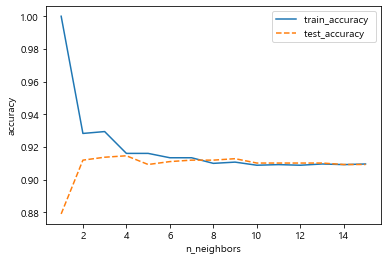

In [11]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'train_accuracy ')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = 'test_accuracy ')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### ㄴ 군집이 1개일 때 train 데이터의 정확도는 1
### ㄴ 군집이 2개가 되면서 test 데이터의 정확도가 증가, train 데이터 정확도 감소

## 모델 생성
### - 가중치별 이웃 수 증가에 따른 정확도 변화

In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2

# 가중치(uniform, distance)
para_weights = (['uniform'] * 10) + (["distance"] * 10)

# zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
# 1번 loop : n_neighbors = para_n_neighbors[0], weights = para_weights[0]
# 2번 loop : n_neighbors = para_n_neighbors[1], weights = para_weights[1]
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights                             
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy 

df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.879
1,2,uniform,0.928,0.912
2,3,uniform,0.929,0.914
3,4,uniform,0.916,0.915
4,5,uniform,0.916,0.909
5,6,uniform,0.913,0.911
6,7,uniform,0.913,0.912
7,8,uniform,0.910,0.912
8,9,uniform,0.911,0.913
9,10,uniform,0.909,0.910


In [13]:
# 그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.879111  0.879111
2                   1.0  0.928326     0.879111  0.912000
3                   1.0  0.929470     0.912889  0.913778
4                   1.0  0.916127     0.914667  0.914667
5                   1.0  0.916127     0.914667  0.909333
6                   1.0  0.913458     0.915556  0.911111
7                   1.0  0.913458     0.913778  0.912000
8                   1.0  0.910027     0.914667  0.912000
9                   1.0  0.910789     0.915556  0.912889
10                  1.0  0.908883     0.915556  0.910222

In [14]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.879111,0.879111
2,1.0,0.928326,0.879111,0.912000
3,1.0,0.929470,0.912889,0.913778
4,1.0,0.916127,0.914667,0.914667
5,1.0,0.916127,0.914667,0.909333


<AxesSubplot:xlabel='Neighbors'>

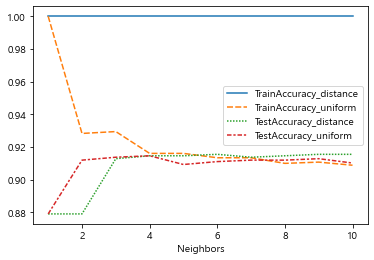

In [15]:
import seaborn as sns
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

### ㄴ 가중치 distance일 때 train 데이터의 모델 정확도는 1 (과대적합)

In [16]:
# 임의로 지정
weights = "uniform"

## 모델 생성
### - 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [17]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy=[]

# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 3

# 거리 계산 방법(minkowski, euclidean, manhattan)
para_metric = (['minkowski'] * 10) + (["euclidean"] * 10) + (['manhattan'] * 10)

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_metric= pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric                           
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy 

df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,1.000,0.879
1,2,minkowski,0.928,0.912
2,3,minkowski,0.929,0.914
3,4,minkowski,0.916,0.915
4,5,minkowski,0.916,0.909
5,6,minkowski,0.913,0.911
6,7,minkowski,0.913,0.912
7,8,minkowski,0.910,0.912
8,9,minkowski,0.911,0.913
9,10,minkowski,0.909,0.910


In [18]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                     values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,TestAccuracy_euclidean,TestAccuracy_manhattan,TestAccuracy_minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.879111,0.880000,0.879111
2,0.928326,0.926420,0.928326,0.912000,0.913778,0.912000
3,0.929470,0.929470,0.929470,0.913778,0.911111,0.913778
4,0.916127,0.918033,0.916127,0.914667,0.913778,0.914667
5,0.916127,0.915364,0.916127,0.909333,0.908444,0.909333


<AxesSubplot:xlabel='Neighbors'>

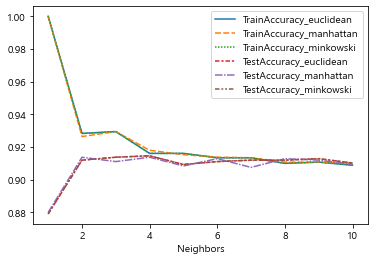

In [19]:
sns.lineplot(data = df_accuracy_metric_pivot)

### ㄴ 거리 계산 방법 별 정확도의 차이가 없음

## 결론 도출

In [20]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 4, weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)

#  평가
y_pred = knn_model.predict(df_test_x)

# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))

# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))

# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

train data accuracy: 0.916
test data accuracy: 0.915

Confusion matrix: 
[[1018    3]
 [  93   11]]


 ### ㄴ 예측 정확도 : 0.915 / 이웃 수 : 4 / 가중치 : 균일(uniform) / 거리 계산 : 차이 없음